IMPORTS

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scikit_posthocs as sp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

LOAD DATA-FRAME

In [278]:
df = pd.read_csv('C:/Users/User/Desktop/עבודות/עבודות של הילה/תיאוריה סטטיסטית/GaltonFamilies.csv')

In [4]:
df.head()

rownames family  father  mother  midparentHeight  children  childNum  \
0         1    001    78.5    67.0            75.43         4         1   
1         2    001    78.5    67.0            75.43         4         2   
2         3    001    78.5    67.0            75.43         4         3   
3         4    001    78.5    67.0            75.43         4         4   
4         5    002    75.5    66.5            73.66         4         1   

   gender  childHeight  
0    male         73.2  
1  female         69.2  
2  female         69.0  
3  female         69.0  
4    male         73.5

AUXILARITY FUNCTIONS

In [6]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """

    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(
            data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")


def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var = stats.levene(group1, group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var < 0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")



p value:0.0004
Reject null hypothesis >> The data is not normally distributed


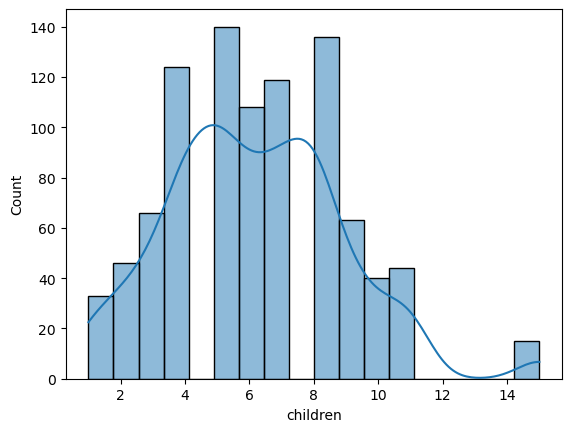

In [7]:
sns.histplot(df,
               x = "children",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

CHILDREN HEIGTH DISTRIBUTION

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


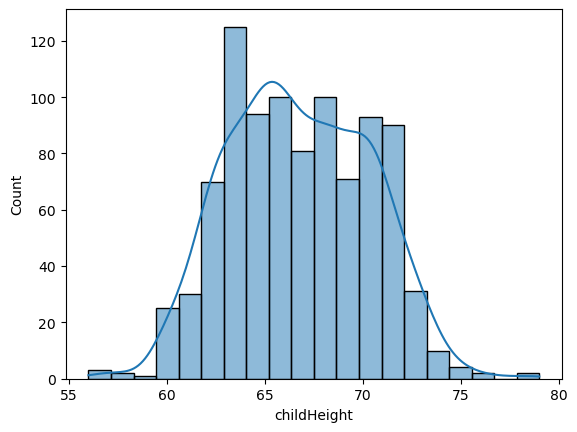

In [9]:
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

TAKE ONLY BOYS

p value:0.0013
Reject null hypothesis >> The data is not normally distributed


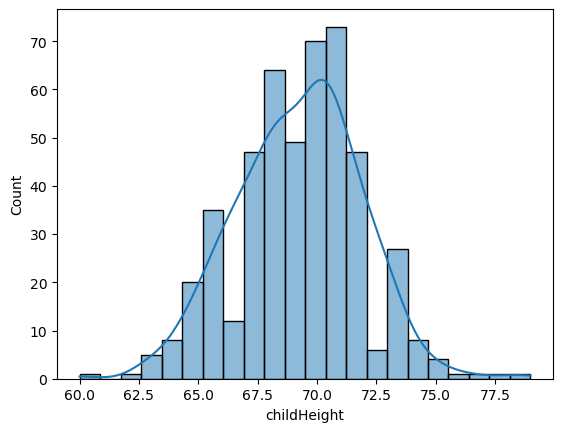

In [11]:
sns.histplot(df[df["gender"]=="male"],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])=="male")])

TAKE ONLY GIRLS

p value:0.0718
Fail to reject null hypothesis >> The data is normally distributed


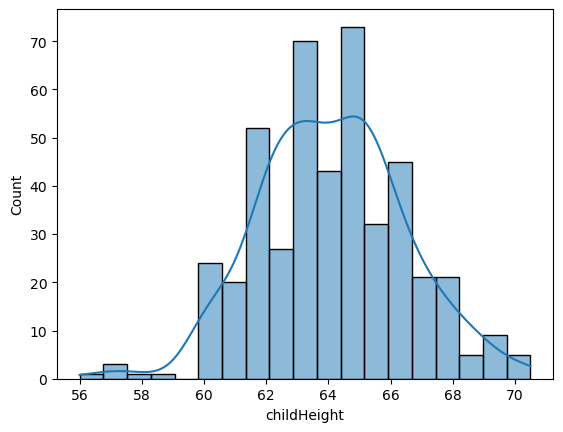

In [13]:
sns.histplot(df[df["gender"]=="female"],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])=="female")])

TAKE ONLY THE FIRSTBORNS

In [15]:
firstborns_df=df[df["childNum"]==1]

In [16]:
firstborns_df.head()

rownames family  father  mother  midparentHeight  children  childNum  \
0          1    001    78.5    67.0            75.43         4         1   
4          5    002    75.5    66.5            73.66         4         1   
8          9    003    75.0    64.0            72.06         2         1   
10        11    004    75.0    64.0            72.06         5         1   
15        16    005    75.0    58.5            69.09         6         1   

   gender  childHeight  
0    male         73.2  
4    male         73.5  
8    male         71.0  
10   male         70.5  
15   male         72.0

FIRSTBORNS HEIGHT DISTRIBUTION

p value:0.0007
Reject null hypothesis >> The data is not normally distributed


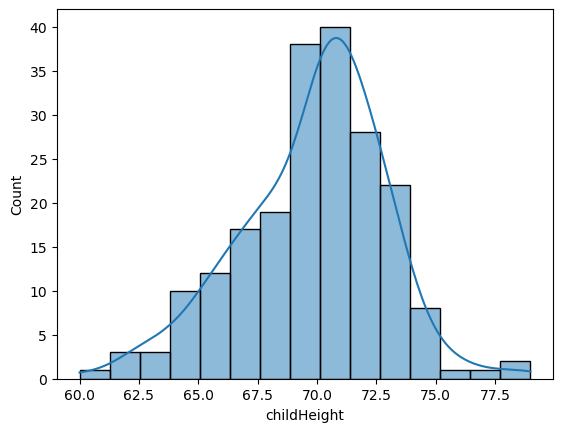

In [18]:
sns.histplot(firstborns_df,
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(firstborns_df["childHeight"]))

MALES FIRSTBORNS HEIGHT DISTRIBUTION

p value:0.0053
Reject null hypothesis >> The data is not normally distributed


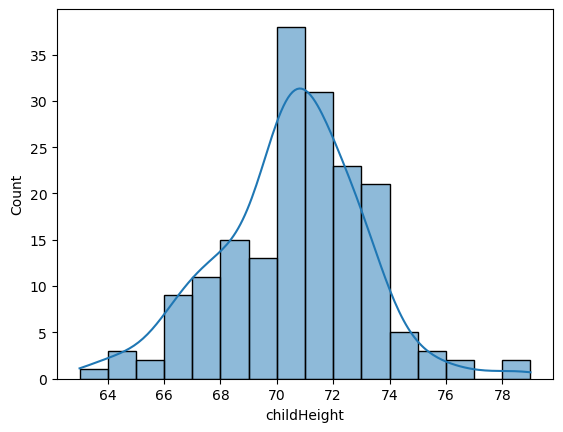

In [20]:
sns.histplot(firstborns_df[firstborns_df["gender"]=="male"],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(firstborns_df["childHeight"])[np.where(np.array(firstborns_df["gender"])=="male")])

FEMALES FIRSTBORNS HEIGHT DISTRIBUTION

p value:0.9474
Fail to reject null hypothesis >> The data is normally distributed


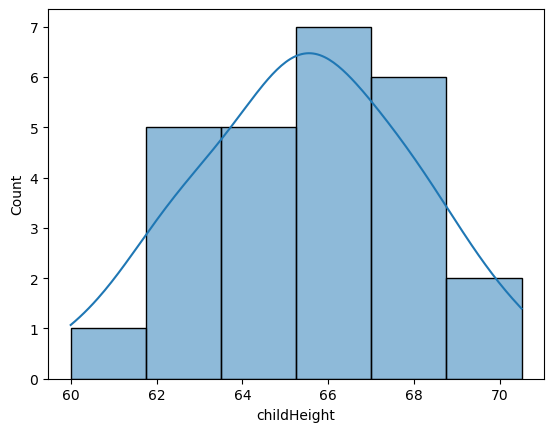

In [22]:
sns.histplot(firstborns_df[firstborns_df["gender"]=="female"],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(firstborns_df["childHeight"])[np.where(np.array(firstborns_df["gender"])=="female")])

FATHERS HEIGHT DISTRIBUTION

p value:0.0995
Fail to reject null hypothesis >> The data is normally distributed


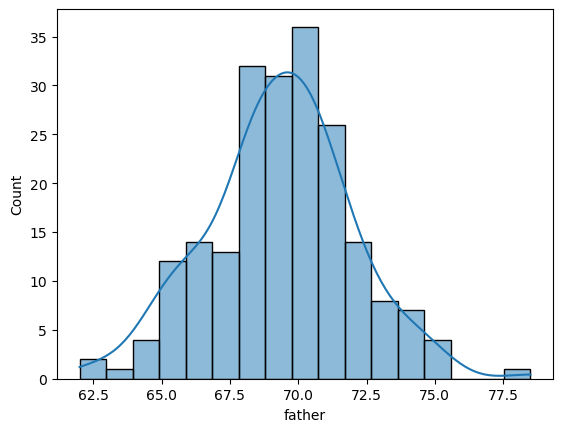

In [24]:
sns.histplot(firstborns_df,
               x = "father",
               stat = 'count',
               kde = True)
check_normality(np.array(firstborns_df["father"]))

MOTHERS HEIGHT DISTRIBUTION

p value:0.1001
Fail to reject null hypothesis >> The data is normally distributed


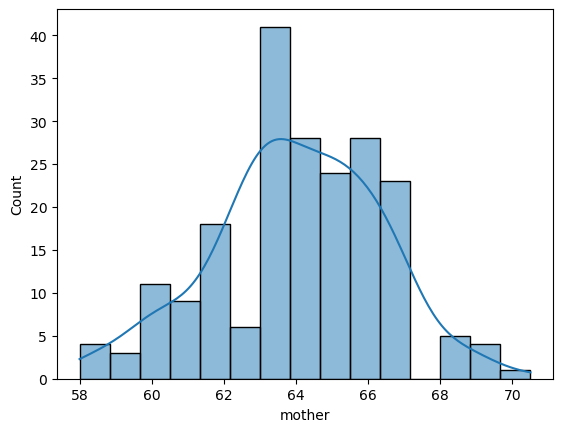

In [26]:
sns.histplot(firstborns_df,
               x = "mother",
               stat = 'count',
               kde = True)
check_normality(np.array(firstborns_df["mother"]))

MIDPARENTS HEIGHT DISTRIBUTION

p value:0.8319
Fail to reject null hypothesis >> The data is normally distributed


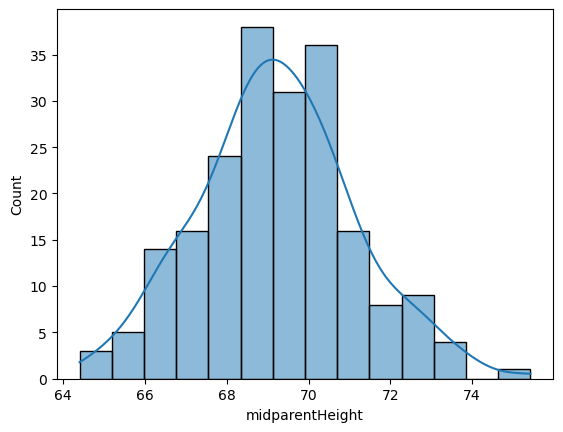

In [28]:
sns.histplot(firstborns_df,
               x = "midparentHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(firstborns_df["midparentHeight"]))

PEARSON CORRELATION MATRIX - NUMERICAL VARIABLES

In [30]:
selected_df=df[["father","mother","midparentHeight","childHeight"]]

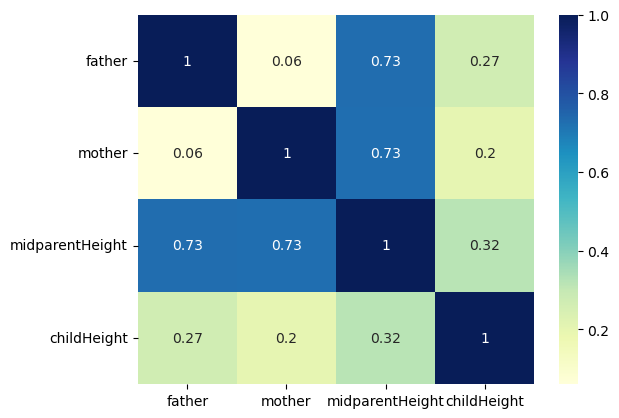

In [31]:
dataplot = sns.heatmap(selected_df.corr(), cmap="YlGnBu", annot=True) 

In [32]:
corr_coefficient, p_value = stats.pearsonr(np.array(selected_df["childHeight"]),np.array(selected_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(selected_df["childHeight"]),np.array(selected_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(selected_df["childHeight"]),np.array(selected_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.26603853892271967 --> with p_value:  1.3498077148869741e-16
child height and mother height correlation:  0.20132194862209996 --> with p_value:  5.362412018228277e-10
child height and midparent height correlation:  0.3209498960639596 --> with p_value:  8.05386499247872e-24


SPEARMAN CORRELATION MATRIX - CATEGORIAL VARIABLES

In [34]:
selected2_df=df[["gender","childNum","childHeight"]]

In [35]:
for i in range(selected2_df.shape[0]):
    if selected2_df["gender"].iloc[i] == "male":
        selected2_df["gender"].iloc[i] = 1
    else:
        selected2_df["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_16240\2968405655.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  selected2_df["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_16240\2968405655.py:3: SettingWithCopyWarning: 
A v

In [36]:
selected2_df.head()

gender  childNum  childHeight
0      1         1         73.2
1      0         2         69.2
2      0         3         69.0
3      0         4         69.0
4      1         1         73.5

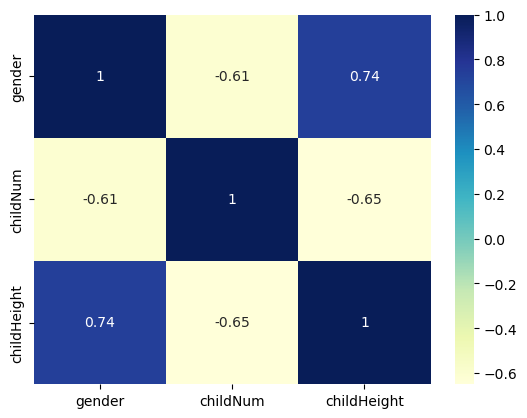

In [37]:
dataplot = sns.heatmap(selected2_df.corr("spearman"), cmap="YlGnBu", annot=True) 

In [38]:
corr_coefficient, p_value = stats.spearmanr(np.array(selected2_df["childHeight"]),np.array(selected2_df["gender"] ))
print("child height and gender correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.spearmanr(np.array(selected2_df["childHeight"]),np.array(selected2_df["childNum"] ))
print("child height and childnum height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and gender correlation:  0.7370167452367875 --> with p_value:  9.64733265650843e-161
child height and childnum height correlation:  -0.6503870533017548 --> with p_value:  2.0420977046022112e-113


CHECK THIS FOR THE GIRLS

In [40]:
girls_df=df[df["gender"]=="female"]

In [41]:
girls_df.head()

rownames family  father  mother  midparentHeight  children  childNum  \
1         2    001    78.5    67.0            75.43         4         2   
2         3    001    78.5    67.0            75.43         4         3   
3         4    001    78.5    67.0            75.43         4         4   
6         7    002    75.5    66.5            73.66         4         3   
7         8    002    75.5    66.5            73.66         4         4   

   gender  childHeight  
1  female         69.2  
2  female         69.0  
3  female         69.0  
6  female         65.5  
7  female         65.5

In [42]:
girls_selected_df=girls_df[["father","mother","midparentHeight","childHeight"]]

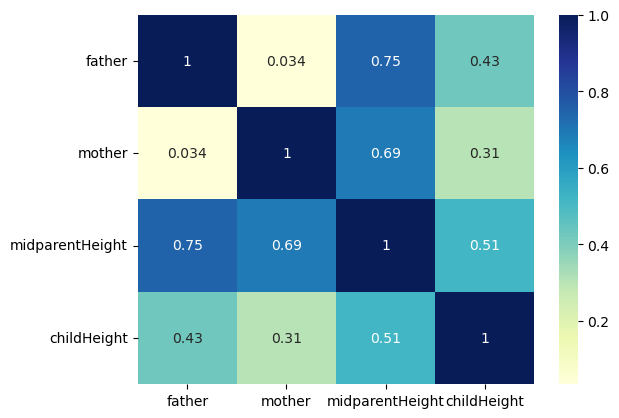

In [43]:
dataplot = sns.heatmap(girls_selected_df.corr(), cmap="YlGnBu", annot=True) 

In [44]:
corr_coefficient, p_value = stats.pearsonr(np.array(girls_selected_df["childHeight"]),np.array(girls_selected_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_selected_df["childHeight"]),np.array(girls_selected_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_selected_df["childHeight"]),np.array(girls_selected_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.42843297684634896 --> with p_value:  1.1970408643547386e-21
child height and mother height correlation:  0.3051644513268953 --> with p_value:  3.2218315248985794e-11
child height and midparent height correlation:  0.51327251718791 --> with p_value:  8.23952706205857e-32


In [49]:
corr_coefficient, p_value = stats.spearmanr(np.array(girls_df["childHeight"]),np.array(girls_df["childNum"] ))
print("girls height and childnum height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

girls height and childnum height correlation:  -0.3293315631439164 --> with p_value:  6.401205320086169e-13


CHECK THIS FOR THE BOYS

In [55]:
boys_df=df[df["gender"]=="male"]

In [59]:
boys_df.head()

rownames family  father  mother  midparentHeight  children  childNum  \
0          1    001    78.5    67.0            75.43         4         1   
4          5    002    75.5    66.5            73.66         4         1   
5          6    002    75.5    66.5            73.66         4         2   
8          9    003    75.0    64.0            72.06         2         1   
10        11    004    75.0    64.0            72.06         5         1   

   gender  childHeight  
0    male         73.2  
4    male         73.5  
5    male         72.5  
8    male         71.0  
10   male         70.5

In [62]:
boys_selected_df=boys_df[["father","mother","midparentHeight","childHeight"]]

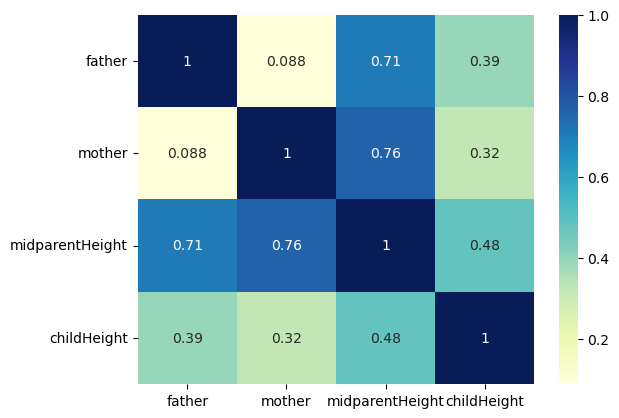

In [65]:
dataplot = sns.heatmap(boys_selected_df.corr(), cmap="YlGnBu", annot=True) 

In [71]:
corr_coefficient, p_value = stats.pearsonr(np.array(boys_selected_df["childHeight"]),np.array(boys_selected_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_selected_df["childHeight"]),np.array(boys_selected_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_selected_df["childHeight"]),np.array(boys_selected_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.3923834966628357 --> with p_value:  3.737108856194152e-19
child height and mother height correlation:  0.3230049836849058 --> with p_value:  3.837934605721925e-13
child height and midparent height correlation:  0.48275279903014195 --> with p_value:  1.8904769740291211e-29


NOW WE WANT TO HAVE A LINEAR REGRESSION MODEL TO PREDICT A CHILD HEIGHT.
INPUTS: GENDER, MID-PARENT HEIGHT, CHILD NUM.
WE HAVE 205 FAMILIES. WE THINK THAT FAMILIES SHOULD STAY TOGETHER IN THEIR SET - TRAIN/TEST, BECAUSE WE DONT WANT TO "CHEAT" AND HELP THE MODEL TO PREDICT RESULTS SIMILIAR TO WHAT IT LEARNED ON TRAIN SET.
LETS TAKE 143 FAMILIES TO TRAIN AND THE OTHER 62 WILL BE ON TEST SET (70-30). IF NUMBER OF CHILDREN WONT BE IN A RELATION OF 70-30 WE WILL FIX IT.

In [82]:
families=df[["gender","childNum","midparentHeight","childHeight"]]

In [87]:
families.head()

gender  childNum  midparentHeight  childHeight
0    male         1            75.43         73.2
1  female         2            75.43         69.2
2  female         3            75.43         69.0
3  female         4            75.43         69.0
4    male         1            73.66         73.5

In [91]:
for i in range(families.shape[0]):
    if families["gender"].iloc[i] == "male":
        families["gender"].iloc[i] = 1
    else:
        families["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_16240\2884774089.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  families["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_16240\2884774089.py:3: SettingWithCopyWarning: 
A value

In [93]:
families=np.array(families)

In [96]:
X=families[:,0:3]
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
x2=X[:,2]
min_x2=min(x2)
max_x2=max(x2)
X[:,2]=(x2-min_x2)/(max_x2-min_x2)
X

array([[1, 0.0, 1.0],
       [0, 0.07142857142857142, 1.0],
       [0, 0.14285714285714285, 1.0],
       ...,
       [0, 0.14285714285714285, 0.2030825022665453],
       [1, 0.0, 0.07887579329102488],
       [0, 0.07142857142857142, 0.07887579329102488]], dtype=object)

In [98]:
Y=families[:,3]
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0636 - val_loss: 0.0597
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0469 - val_loss: 0.0493
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0410 - val_loss: 0.0432
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - val_loss: 0.0396
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - val_loss: 0.0377
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0303 - val_loss: 0.0363
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271 - val_loss: 0.0353
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284 - val_loss: 0.0343
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - val_loss: 0.0334
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268 - val_loss: 0.0325
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263 - val_loss: 0.0317
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

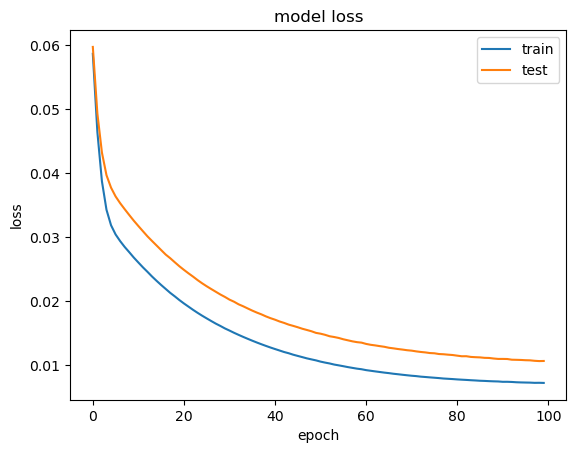

In [102]:
model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


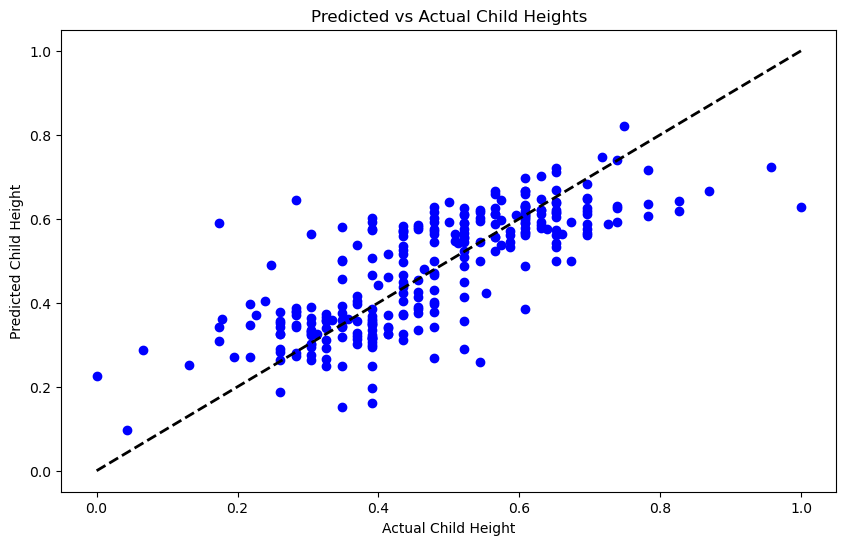

In [103]:
# Plot the predicted vs actual child heights
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [104]:
families=df[["gender","midparentHeight","childHeight"]]

In [105]:
for i in range(families.shape[0]):
    if families["gender"].iloc[i] == "male":
        families["gender"].iloc[i] = 1
    else:
        families["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_16240\2884774089.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  families["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_16240\2884774089.py:3: SettingWithCopyWarning: 
A value

In [106]:
families=np.array(families)

In [107]:
X=families[:,0:2]
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
X

array([[1, 1.0],
       [0, 1.0],
       [0, 1.0],
       ...,
       [0, 0.2030825022665453],
       [1, 0.07887579329102488],
       [0, 0.07887579329102488]], dtype=object)

In [108]:
Y=families[:,2]
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0885 - val_loss: 0.9800
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0179 - val_loss: 0.9073
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8834 - val_loss: 0.8397
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8078 - val_loss: 0.7766
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7503 - val_loss: 0.7180
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7633 - val_loss: 0.6627
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6951 - val_loss: 0.6122
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6109 - val_loss: 0.5654
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5850 - val_loss: 0.5226
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5401 - val_loss: 0.4836
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4785 - val_loss: 0.4475
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4

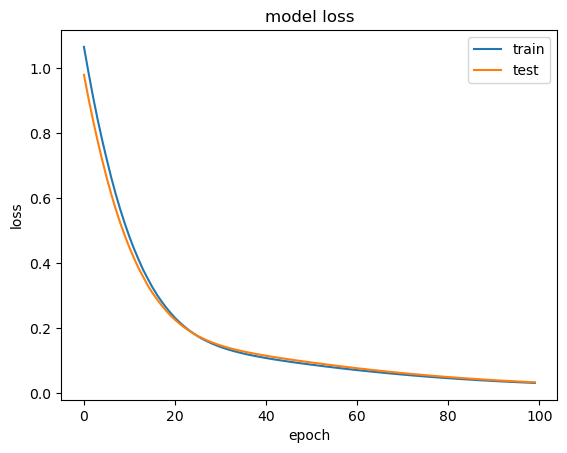

In [110]:
model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


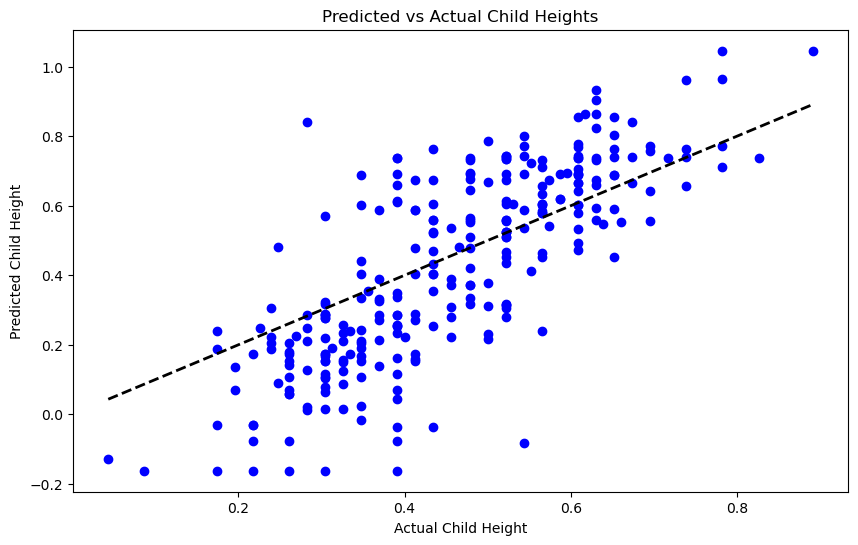

In [111]:
# Plot the predicted vs actual child heights
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [112]:
# mom ad dad

In [113]:
families=df[["gender","childNum","father","mother","childHeight"]]

In [114]:
for i in range(families.shape[0]):
    if families["gender"].iloc[i] == "male":
        families["gender"].iloc[i] = 1
    else:
        families["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_16240\2884774089.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  families["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_16240\2884774089.py:3: SettingWithCopyWarning: 
A value

In [115]:
families=np.array(families)

In [116]:
X=families[:,0:4]
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
x2=X[:,2]
min_x2=min(x2)
max_x2=max(x2)
X[:,2]=(x2-min_x2)/(max_x2-min_x2)
x3=X[:,3]
min_x3=min(x3)
max_x3=max(x3)
X[:,3]=(x3-min_x3)/(max_x3-min_x3)
X


array([[1, 0.0, 1.0, 0.72],
       [0, 0.07142857142857142, 1.0, 0.72],
       [0, 0.14285714285714285, 1.0, 0.72],
       ...,
       [0, 0.14285714285714285, 0.0, 0.64],
       [1, 0.0, 0.030303030303030304, 0.4],
       [0, 0.07142857142857142, 0.030303030303030304, 0.4]], dtype=object)

In [117]:
Y=families[:,4]
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)


In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3361 - val_loss: 0.3282
Epoch 2/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3161 - val_loss: 0.3145
Epoch 3/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2908 - val_loss: 0.3022
Epoch 4/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2825 - val_loss: 0.2905
Epoch 5/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2751 - val_loss: 0.2791
Epoch 6/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2671 - val_loss: 0.2679
Epoch 7/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2451 - val_loss: 0.2575
Epoch 8/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2482 - val_loss: 0.2471
Epoch 9/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2386 - val_loss: 0.2370
Epoch 10/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2159 - val_loss: 0.2272
Epoch 11/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1990 - val_loss: 0.2178
Epoch 12/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1980 - val_lo

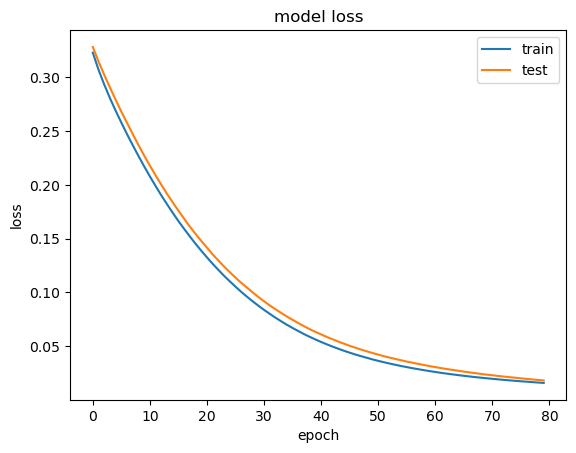

In [119]:
model = tf.keras.Sequential([
    keras.Input(shape=(4,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=80, validation_data=(X_test,Y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


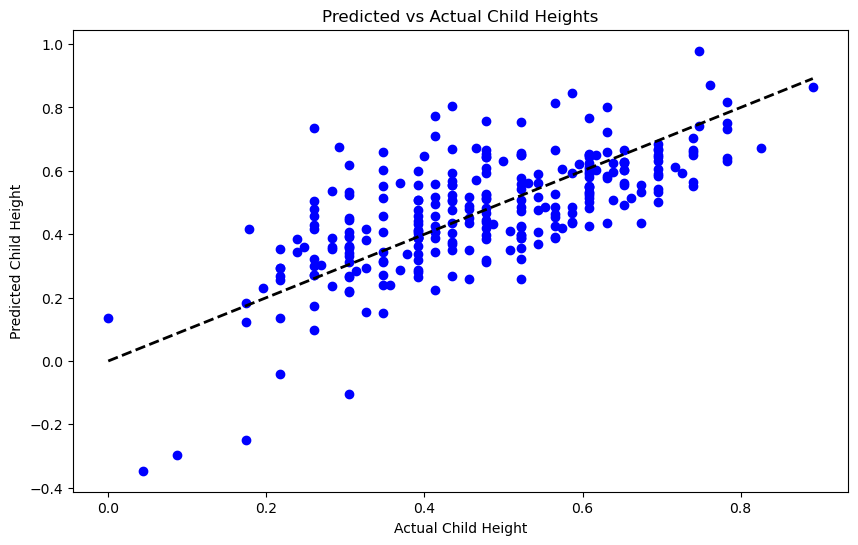

In [120]:
# Plot the predicted vs actual child heights
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [121]:
model.get_weights()

[array([[ 0.02024505],
        [-0.68065345],
        [ 0.5208743 ],
        [ 0.35919797]], dtype=float32),
 array([0.17940427], dtype=float32)]

In [123]:
metric = keras.metrics.R2Score()
metric.update_state(Y_test, Y_test_pred)
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.27214015>

In [126]:
metric = keras.metrics.R2Score()
metric.update_state(Y_train, model.predict(X_train))
result = metric.result()
result

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.3381456>

IN FAMILIES VS GLOBAL DATA

<Axes: xlabel='childHeight', ylabel='Count'>

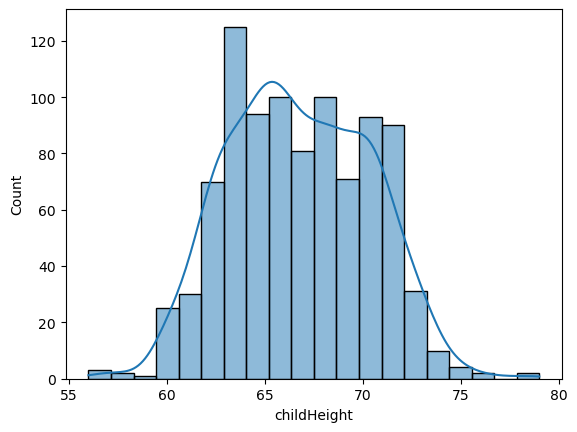

In [133]:
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)

In [134]:
childHeight=np.array(df["childHeight"])

In [135]:
minH=min(childHeight)
maxH=max(childHeight)
meanH=np.mean(childHeight)
stdH=np.std(childHeight)

In [326]:
print(minH,maxH,meanH,stdH)
print("global interval is: ",maxH-minH)

56.0 79.0 66.74593147751605 3.5773346010057634
global interval is:  23.0


In [280]:
df["family"].iloc[617]

'136'

In [282]:
# correct df
correct_df=df
for i in range(0,609):
    correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])
for i in range(609,617):
    if correct_df["family"].iloc[i] == "136A":
        correct_df["family"].iloc[i]=136
for i in range(617,934):
    correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])+1   

C:\Users\User\AppData\Local\Temp\ipykernel_16240\3730985834.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])
C:\Users\User\AppData\Local\Temp\ipykernel_16240\3730985834.py:4: 

In [296]:
families=[]
current_family=[]
family_num=1
for i in range(correct_df.shape[0]):
    if correct_df["family"].iloc[i] == family_num:
        current_family.append(correct_df["childHeight"].iloc[i])
    else:
        families.append(current_family)
        family_num+=1
        current_family=[]
        current_family.append(correct_df["childHeight"].iloc[i])
families.append(current_family)      

In [318]:
intervals=[]
for family in families:
    if max(family)-min(family)>0:
        intervals.append(max(family)-min(family))

In [320]:
min(intervals)

0.7999999999999972

<Axes: ylabel='Count'>

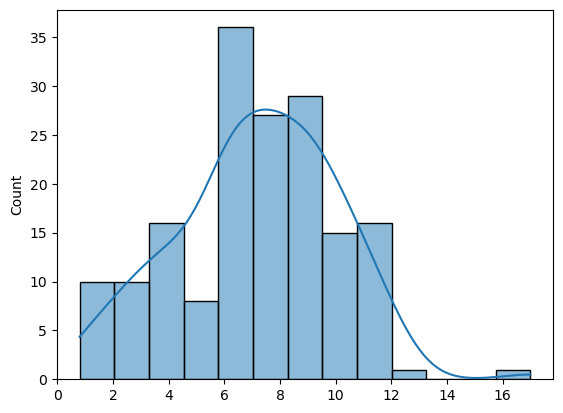

In [328]:
sns.histplot(intervals,stat = 'count', kde = True)

In [330]:
check_normality(intervals)

p value:0.2415
Fail to reject null hypothesis >> The data is normally distributed
